In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from skimage.color import rgb2gray


def preprocess(array):
    """
    Нормализует предоставленный массив и преобразует его в соответствующий формат.

    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 32, 32, 3))
    return array


def noise(array):
    """
    Добавляет случайный шум к каждому изображению в предоставленном массиве.

    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Отображает десять случайных изображений из каждого из предоставленных массивов.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(rgb2gray(image1).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(rgb2gray(image2).reshape(32, 32, 1), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

170498071/170498071 [==============================] - 2s 0us/step


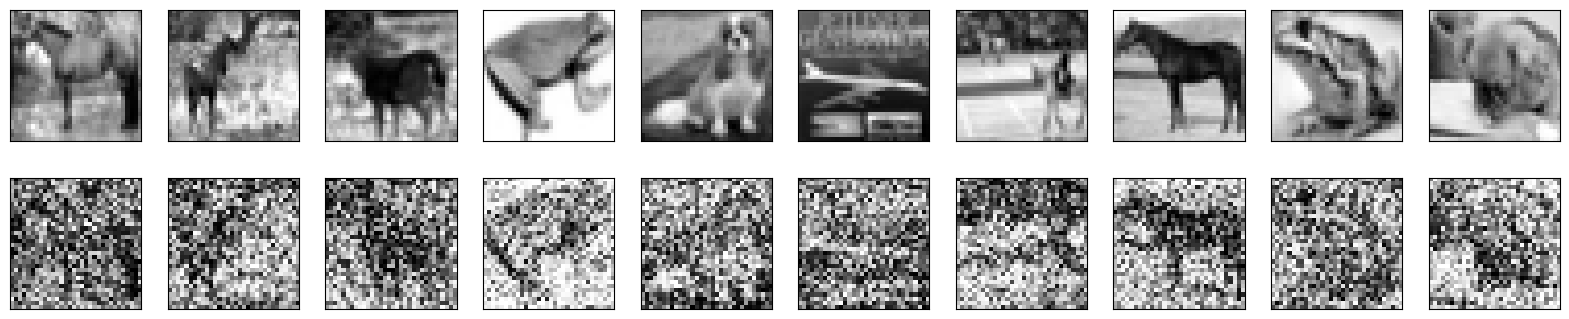

In [ ]:
# Поскольку для кодирования и декодирования нам нужны только изображения из набора данных, мы
# не будем использовать метки классов
(train_data, _), (test_data, _) = cifar10.load_data()

# Нормализация и изменение формы данных
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Создание копии данных с добавленным шумом
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Отображение данных выборки и его версии с добавленным шумом
display(train_data, noisy_train_data)

In [ ]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)



# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 32)       9248  

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
391/391 [==============================] - 17s 14ms/step - loss: 0.5822 - val_loss: 0.5665
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5636 - val_loss: 0.5629
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5612 - val_loss: 0.5607
Epoch 4/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5591 - val_loss: 0.5593
Epoch 5/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5582 - val_loss: 0.5587
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 0.5577 - val_loss: 0.5583
Epoch 7/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5572 - val_loss: 0.5577
Epoch 8/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5569 - val_loss: 0.5575
Epoch 9/50
391/391 [==============================] - 4s 11ms/step - loss: 0.5565 - val_loss: 0.5571
Epoch 10/50
391/391 [==============================] - 4s 12ms/step - loss: 0.5562 - val_l

313/313 [==============================] - 1s 2ms/step


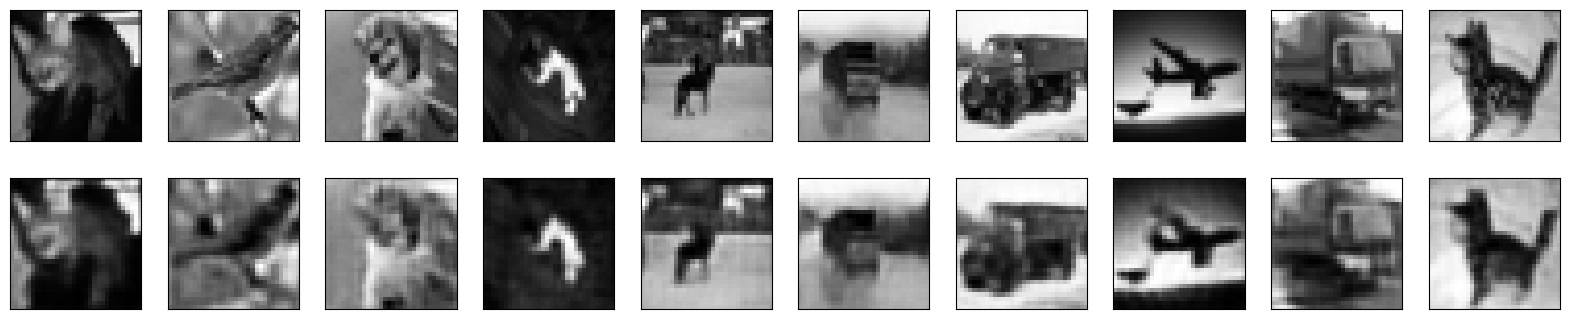

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
391/391 [==============================] - 5s 13ms/step - loss: 0.5757 - val_loss: 0.5739
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5724 - val_loss: 0.5726
Epoch 3/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5715 - val_loss: 0.5726
Epoch 4/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5710 - val_loss: 0.5716
Epoch 5/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5706 - val_loss: 0.5712
Epoch 6/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5704 - val_loss: 0.5711
Epoch 7/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5702 - val_loss: 0.5709
Epoch 8/100
391/391 [==============================] - 5s 12ms/step - loss: 0.5700 - val_loss: 0.5710
Epoch 9/100
391/391 [==============================] - 4s 11ms/step - loss: 0.5699 - val_loss: 0.5707
Epoch 10/100
391/391 [==============================] - 5s 12ms/step - loss: 0.569

313/313 [==============================] - 1s 3ms/step


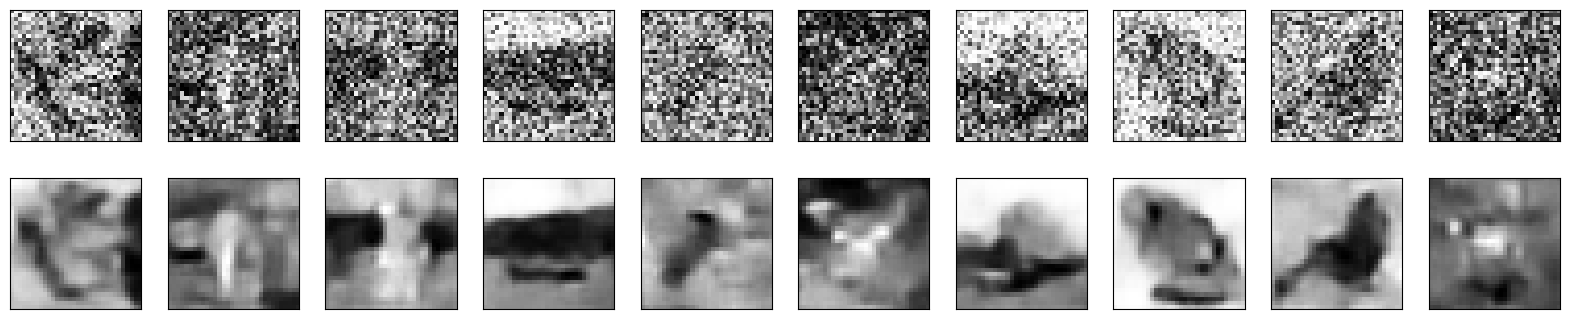

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)

Задание 3

In [ ]:
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb, rgb2gray
from skimage.transform import resize
from skimage.io import imsave
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
import os

In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16() # Импортируем предобученную модель VGG16 с параметрами по умолчанию
newmodel = Sequential() # Создаём пустую модель

for i, layer in enumerate(vggmodel.layers): # Заполняем пустую модель слоями из предобученной модели VGG16 
    if i<19:          # Только до 19-го слоя, чтобы включить только слои, используемые для извлечения признаков
      newmodel.add(layer)

newmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
for layer in newmodel.layers:
  layer.trainable=False   # Мы не хотим снова обучать эти слои, поэтому False. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Dog/'


train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(224, 224), batch_size=100, class_mode=None)

print(train)

Found 2094 images belonging to 3 classes.


In [ ]:
path = '/content/drive/MyDrive/Dog/Dog'
path1 = '/content/drive/MyDrive/Dog/Dog/'


# Добавление валидационной выборки
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

train = train_datagen.flow_from_directory(path, target_size=(224, 224),
                                          batch_size=100, class_mode=None, subset='training')
val = train_datagen.flow_from_directory(path1, target_size=(224, 224),
                                          batch_size=100, class_mode=None, subset='validation')

print(train)


Found 1667 images belonging to 11 classes.
Found 411 images belonging to 11 classes.


In [ ]:
print(train[0].shape)

(100, 224, 224, 3)


In [ ]:
X_train =[]
Y_train =[]
X_val =[]
Y_val =[]
save_folder = '/content/'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
    
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X_train.append(lab[:,:,0])
      Y_train.append(lab[:,:,1:] / 128) # Значения A и B находятся в диапазоне от -127 до 128, 
      # поэтому мы делим значения на 128, чтобы ограничить значения от -1 до 1.
  except:
     print('error')
for img in val[0]:
    try:
        lab = rgb2lab(img)
        X_val.append(lab[:,:,0])
        Y_val.append(lab[:,:,1:] / 128)
    except:
        print('error')
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

X_train = X_train.reshape(X_train.shape+(1,))
X_val = X_val.reshape(X_val.shape+(1,))

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)  
print(Y_val.shape)

(100, 224, 224, 1)
(100, 224, 224, 2)
(100, 224, 224, 1)
(100, 224, 224, 2)


In [ ]:
vggfeatures = []
for i, sample in enumerate(X_train):
  sample = gray2rgb(sample)
  sample = sample.reshape((1,224,224,3))
  sample = keras.applications.vgg16.preprocess_input(sample)
  prediction = newmodel.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)

1/1 [==============================] - 1s 557ms/step
(100, 7, 7, 512)


In [ ]:
#Decoder
model = Sequential()

model.add(Conv2D(256, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.summary()


model.compile(optimizer='Adam', loss='mse' , metrics=['accuracy'])



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 7, 7, 256)         1179904   
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 128)         295040    
                                                                 
 up_sampling2d_15 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 up_sampling2d_16 (UpSamplin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)       

In [ ]:
model.fit(vggfeatures, Y_train, verbose=1, epochs=1000, batch_size=256)

model.save('/content/colorize_autoencoder_VGG16.h5')

Epoch 1/1000
1/1 [==============================] - 8s 8s/step - loss: 0.6800 - accuracy: 0.6600
Epoch 2/1000
1/1 [==============================] - 4s 4s/step - loss: 0.8979 - accuracy: 0.4150
Epoch 3/1000
1/1 [==============================] - 4s 4s/step - loss: 0.4241 - accuracy: 0.5764
Epoch 4/1000
1/1 [==============================] - 6s 6s/step - loss: 0.2672 - accuracy: 0.5792
Epoch 5/1000
1/1 [==============================] - 6s 6s/step - loss: 0.1960 - accuracy: 0.4558
Epoch 6/1000
1/1 [==============================] - 4s 4s/step - loss: 0.1095 - accuracy: 0.4147
Epoch 7/1000
1/1 [==============================] - 5s 5s/step - loss: 0.0579 - accuracy: 0.4058
Epoch 8/1000
1/1 [==============================] - 4s 4s/step - loss: 0.0461 - accuracy: 0.4259
Epoch 9/1000
1/1 [==============================] - 4s 4s/step - loss: 0.0347 - accuracy: 0.4210
Epoch 10/1000
1/1 [==============================] - 4s 4s/step - loss: 0.0242 - accuracy: 0.3878
Epoch 11/1000
1/1 [==========

In [ ]:
model = tf.keras.models.load_model('/content/colorize_autoencoder_VGG16.h5',
                                   custom_objects=None,
                                   compile=True)

In [ ]:
testpath = '/content/drive/MyDrive/Dog/Dog/Chihuahua/' 
files = os.listdir(testpath)
for idx, file in enumerate(files):
    # Нормализация
    test = img_to_array(load_img(testpath+file))
    test = resize(test, (224,224), anti_aliasing=True)
    test*= 1.0/255
    lab = rgb2lab(test)
    l = lab[:,:,0]
    L = gray2rgb(l)
    L = L.reshape((1,224,224,3))
    L = keras.applications.vgg16.preprocess_input(L)
    # Предсказание
    vggpred = newmodel.predict(L)
    ab = model.predict(vggpred)

    # Формирование выходного изображения
    ab = ab*128
    cur = np.zeros((224, 224, 3))
    cur[:,:,0] = l
    cur[:,:,1:] = ab

    # Сохранение выходного изображения
    imsave('/content/'+str(idx)+".jpg", lab2rgb(cur))


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


In [ ]:
import os
from PIL import Image

# Mount your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your Chihuahua folder on Google Drive
chihuahua_folder = '/content/drive/MyDrive/Dog/Dog/Chihuahua'

# Set the path to the folder where you want to save the new images
new_folder = '/content/CB'
if not os.path.exists(new_folder):
    os.makedirs(new_folder)

# Set the number of images you want to save
num_images = 100

# Loop through the Chihuahua folder and convert the first 100 images to black and white
count = 0
for filename in os.listdir(chihuahua_folder):
    if filename.endswith('.jpg') and count < num_images:
        image_path = os.path.join(chihuahua_folder, filename)
        new_filename = f'CB{count+1}.jpg'
        new_image_path = os.path.join(new_folder, new_filename)
        with Image.open(image_path).convert('L') as im:
            im_resized = im.resize((224, 224))
            im_resized.save(new_image_path)
        count += 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


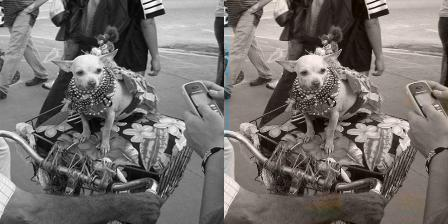

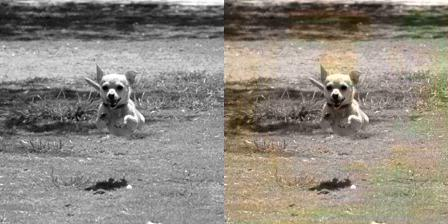

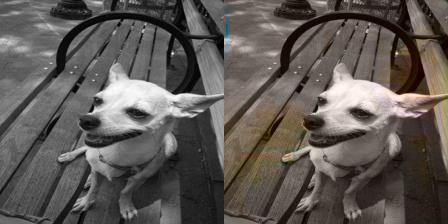

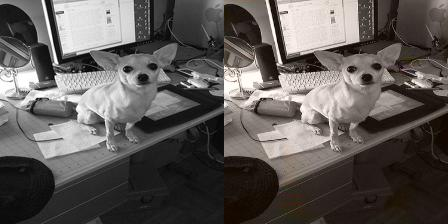

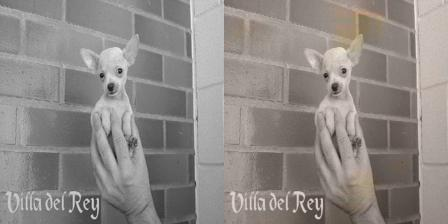

In [77]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

imo_1 = cv2.imread("/content/CB/CB63.jpg")
im_1 = cv2.imread("/content/62.jpg")
imo_2 = cv2.imread("/content/CB/CB50.jpg")
im_2 = cv2.imread("/content/49.jpg")
imo_3 = cv2.imread("/content/CB/CB25.jpg")
im_3 = cv2.imread("/content/24.jpg")
imo_4 = cv2.imread("/content/CB/CB1.jpg")
im_4 = cv2.imread("/content/0.jpg")
imo_5 = cv2.imread("/content/CB/CB10.jpg")
im_5 = cv2.imread("/content/9.jpg")

# resize the images imo_1, imo_2, and imo_3 to have the same shape as im_1, im_2, and im_3
# imo_1 = cv2.resize(imo_1, (im_1.shape[1], im_1.shape[0]))
# imo_2 = cv2.resize(imo_2, (im_2.shape[1], im_2.shape[0]))
# imo_3 = cv2.resize(imo_3, (im_3.shape[1], im_3.shape[0]))

# concatenate images along the horizontal axis
pred_1 = np.concatenate((imo_1, im_1), axis=1)
pred_2 = np.concatenate((imo_2, im_2), axis=1)
pred_3 = np.concatenate((imo_3, im_3), axis=1)
pred_4 = np.concatenate((imo_4, im_4), axis=1)
pred_5 = np.concatenate((imo_5, im_5), axis=1)

# display the concatenated images
cv2_imshow(pred_1)
cv2_imshow(pred_2)
cv2_imshow(pred_3)
cv2_imshow(pred_4)
cv2_imshow(pred_5)